# Shiyu's Jupyter Notebook for Individual Project 2 

The purpose of this project is to get multiple datasets from the web into Python, clean those datasets, merge them appropriately into a single dataset, and find some interesting insights in the data. The topic for this project is the ongoing worldwide spread of the coronavirus. 

The original datasets on the spread of the virus are from The Johns Hopkins University (JHU) Center for Systems Science and Engineering. The data is available [on this website](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series).


At first, I import all necessary python packages to start this project. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats
%matplotlib inline

Three datasets are loaded from web, they are the time series global confirmed cases, deaths cases and recovered, from 1/22/20 to 4/21/20. 

In [2]:
df_confirm = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_death = pd.read_csv('time_series_covid19_deaths_global.csv')
df_recover = pd.read_csv('time_series_covid19_recovered_global.csv')

In [3]:
df_confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,607,665,714,784,840,906,933,996,1026,1092
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,446,467,475,494,518,539,548,562,584,609
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,638,646,659,673,673,696,704,713,717,717
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,24,24,24,24


Before merging the datasets, I did some pre-processing and cleaning process. The orginial time series datasets reported cases from *Australia*, *Canada* and *China* at the province/state level, and also reported cases from Dependencies of *the Netherlands*, *the UK*, *France* and *Denmark* under the province/state level. The US and other countries are reported at the country level. 

To have a better country-to-country comparsion, I group the states and dependencies of each listed country above and sum the number of cases. The index is reset to be clear. 

The latitude and Longitude of the country is irrelavant so I drop the two columns. I also add the suffix "confirmed","deaths","recovered" to each time series data so that it will not cause confusion after merging the three datasets. 

In [4]:
df_confirm = df_confirm.groupby(["Country/Region"]).sum().reset_index()
df_confirm = df_confirm.drop(columns=['Lat','Long'])
df_confirm = df_confirm.add_suffix('_confirmed')
df_confirm.columns = ['Country/Region'] + list(df_confirm.columns[1:])
df_death = df_death.groupby(["Country/Region"]).sum().reset_index()
df_death = df_death.drop(columns=['Lat','Long'])
df_death = df_death.add_suffix('_deaths')
df_death.columns = ['Country/Region'] + list(df_death.columns[1:])
df_recover = df_recover.groupby(["Country/Region"]).sum().reset_index()
df_recover = df_recover.drop(columns=['Lat','Long'])
df_recover = df_recover.add_suffix('_recovered')
df_recover.columns = ['Country/Region'] + list(df_recover.columns[1:])

In [5]:
df_confirm.head()

,Country/Region,1/22/20_confirmed,1/23/20_confirmed,1/24/20_confirmed,1/25/20_confirmed,1/26/20_confirmed,1/27/20_confirmed,1/28/20_confirmed,1/29/20_confirmed,1/30/20_confirmed,...,4/12/20_confirmed,4/13/20_confirmed,4/14/20_confirmed,4/15/20_confirmed,4/16/20_confirmed,4/17/20_confirmed,4/18/20_confirmed,4/19/20_confirmed,4/20/20_confirmed,4/21/20_confirmed
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,607,665,714,784,840,906,933,996,1026,1092
1,Albania,0,0,0,0,0,0,0,0,0,...,446,467,475,494,518,539,548,562,584,609
2,Algeria,0,0,0,0,0,0,0,0,0,...,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811
3,Andorra,0,0,0,0,0,0,0,0,0,...,638,646,659,673,673,696,704,713,717,717
4,Angola,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,24,24,24,24


I merge the three time series datasets into one, called **df_new**. The new dataset has one row for each country, with the *Confirmed* time series first, then the *Deaths* time series second, and the *Recovered* time series last in the row. 

In [6]:
df_new = df_confirm.merge(df_death.merge(df_recover,on='Country/Region'),on='Country/Region')

In [7]:
pd.options.display.max_columns = None
df_new.head()

,Country/Region,1/22/20_confirmed,1/23/20_confirmed,1/24/20_confirmed,1/25/20_confirmed,1/26/20_confirmed,1/27/20_confirmed,1/28/20_confirmed,1/29/20_confirmed,1/30/20_confirmed,1/31/20_confirmed,2/1/20_confirmed,2/2/20_confirmed,2/3/20_confirmed,2/4/20_confirmed,2/5/20_confirmed,2/6/20_confirmed,2/7/20_confirmed,2/8/20_confirmed,2/9/20_confirmed,2/10/20_confirmed,2/11/20_confirmed,2/12/20_confirmed,2/13/20_confirmed,2/14/20_confirmed,2/15/20_confirmed,2/16/20_confirmed,2/17/20_confirmed,2/18/20_confirmed,2/19/20_confirmed,2/20/20_confirmed,2/21/20_confirmed,2/22/20_confirmed,2/23/20_confirmed,2/24/20_confirmed,2/25/20_confirmed,2/26/20_confirmed,2/27/20_confirmed,2/28/20_confirmed,2/29/20_confirmed,3/1/20_confirmed,3/2/20_confirmed,3/3/20_confirmed,3/4/20_confirmed,3/5/20_confirmed,3/6/20_confirmed,3/7/20_confirmed,3/8/20_confirmed,3/9/20_confirmed,3/10/20_confirmed,3/11/20_confirmed,3/12/20_confirmed,3/13/20_confirmed,3/14/20_confirmed,3/15/20_confirmed,3/16/20_confirmed,3/17/20_confirmed,3/18/20_confirmed,3/19/20_confirmed,3/20/20_confirmed,3/21/20_confirmed,3/22/20_confirmed,3/23/20_confirmed,3/24/20_confirmed,3/25/20_confirmed,3/26/20_confirmed,3/27/20_confirmed,3/28/20_confirmed,3/29/20_confirmed,3/30/20_confirmed,3/31/20_confirmed,4/1/20_confirmed,4/2/20_confirmed,4/3/20_confirmed,4/4/20_confirmed,4/5/20_confirmed,4/6/20_confirmed,4/7/20_confirmed,4/8/20_confirmed,4/9/20_confirmed,4/10/20_confirmed,4/11/20_confirmed,4/12/20_confirmed,4/13/20_confirmed,4/14/20_confirmed,4/15/20_confirmed,4/16/20_confirmed,4/17/20_confirmed,4/18/20_confirmed,4/19/20_confirmed,4/20/20_confirmed,4/21/20_confirmed,1/22/20_deaths,1/23/20_deaths,1/24/20_deaths,1/25/20_deaths,1/26/20_deaths,1/27/20_deaths,1/28/20_deaths,1/29/20_deaths,1/30/20_deaths,1/31/20_deaths,2/1/20_deaths,2/2/20_deaths,2/3/20_deaths,2/4/20_deaths,2/5/20_deaths,2/6/20_deaths,2/7/20_deaths,2/8/20_deaths,2/9/20_deaths,2/10/20_deaths,2/11/20_deaths,2/12/20_deaths,2/13/20_deaths,2/14/20_deaths,2/15/20_deaths,2/16/20_deaths,2/17/20_deaths,2/18/20_deaths,2/19/20_deaths,2/20/20_deaths,2/21/20_deaths,2/22/20_deaths,2/23/20_deaths,2/24/20_deaths,2/25/20_deaths,2/26/20_deaths,2/27/20_deaths,2/28/20_deaths,2/29/20_deaths,3/1/20_deaths,3/2/20_deaths,3/3/20_deaths,3/4/20_deaths,3/5/20_deaths,3/6/20_deaths,3/7/20_deaths,3/8/20_deaths,3/9/20_deaths,3/10/20_deaths,3/11/20_deaths,3/12/20_deaths,3/13/20_deaths,3/14/20_deaths,3/15/20_deaths,3/16/20_deaths,3/17/20_deaths,3/18/20_deaths,3/19/20_deaths,3/20/20_deaths,3/21/20_deaths,3/22/20_deaths,3/23/20_deaths,3/24/20_deaths,3/25/20_deaths,3/26/20_deaths,3/27/20_deaths,3/28/20_deaths,3/29/20_deaths,3/30/20_deaths,3/31/20_deaths,4/1/20_deaths,4/2/20_deaths,4/3/20_deaths,4/4/20_deaths,4/5/20_deaths,4/6/20_deaths,4/7/20_deaths,4/8/20_deaths,4/9/20_deaths,4/10/20_deaths,4/11/20_deaths,4/12/20_deaths,4/13/20_deaths,4/14/20_deaths,4/15/20_deaths,4/16/20_deaths,4/17/20_deaths,4/18/20_deaths,4/19/20_deaths,4/20/20_deaths,4/21/20_deaths,1/22/20_recovered,1/23/20_recovered,1/24/20_recovered,1/25/20_recovered,1/26/20_recovered,1/27/20_recovered,1/28/20_recovered,1/29/20_recovered,1/30/20_recovered,1/31/20_recovered,2/1/20_recovered,2/2/20_recovered,2/3/20_recovered,2/4/20_recovered,2/5/20_recovered,2/6/20_recovered,2/7/20_recovered,2/8/20_recovered,2/9/20_recovered,2/10/20_recovered,2/11/20_recovered,2/12/20_recovered,2/13/20_recovered,2/14/20_recovered,2/15/20_recovered,2/16/20_recovered,2/17/20_recovered,2/18/20_recovered,2/19/20_recovered,2/20/20_recovered,2/21/20_recovered,2/22/20_recovered,2/23/20_recovered,2/24/20_recovered,2/25/20_recovered,2/26/20_recovered,2/27/20_recovered,2/28/20_recovered,2/29/20_recovered,3/1/20_recovered,3/2/20_recovered,3/3/20_recovered,3/4/20_recovered,3/5/20_recovered,3/6/20_recovered,3/7/20_recovered,3/8/20_recovered,3/9/20_recovered,3/10/20_recovered,3/11/20_recovered,3/12/20_recovered,3/13/20_recovered,3/14/20_recovered,3/15/20_recovered,3/16/20_recovered,3/17/20_recovered,3/18/20_recovered,3/19/20_recovered,3/20/20_r

The dataframe is saved as the first pickle file. 

In [8]:
df_new.to_pickle('COVID-19 time series.pkl')

I also got datasets from the World Bank to do the country-to-country comparsion. I got two country-to-country indicators, one is the total population of the country, the other one is the population density. I loaded the two datasets, skipped the first four rows of introduction information. 

In [9]:
df_pop = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_988606.csv',skiprows=4)
df_density = pd.read_csv('API_EN.POP.DNST_DS2_en_csv_v2_988966.csv',skiprows=4)
df_pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN,NaN


The project cares about the most recent information, so I just use the most recent information from 2018. Country code and Indicator code is not useful so I dropped the two columns. 

In [10]:
df_pop['2018 total population'] = df_pop['2018']
df_pop = df_pop[['Country Name','Indicator Name','2018 total population']]
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 3 columns):
Country Name             264 non-null object
Indicator Name           264 non-null object
2018 total population    262 non-null float64
dtypes: float64(1), object(2)
memory usage: 6.3+ KB


In [11]:
df_density['2018 population density'] = df_density['2018']
df_density = df_density[['Country Name','Indicator Name','2018 population density']]
df_density.head()

,Country Name,Indicator Name,2018 population density
0,Aruba,Population density (people per sq. km of land ...,588.027778
1,Afghanistan,Population density (people per sq. km of land ...,56.937760
2,Angola,Population density (people per sq. km of land ...,24.713052
3,Albania,Population density (people per sq. km of land ...,104.612263
4,Andorra,Population density (people per sq. km of land ...,163.842553


Before merging the covid19 time series dataframe and the World Bank indicator dataframes, I have to do manual conversions of the country names because not all the country names matches for the dataframes. First, I import get_close_matches from the difflib module. 

In [12]:
from difflib import get_close_matches

I create a function -- "best_guess" to try guess the similar names. I would prefer the country name from the World Bank population dataframe to match the country name from covid19 time series dataframe. If the name matches, the name is kept. If the name does not match, the function will find a best match of country name from the covid19 time series dataframe to the World Bank population dataframe. If no best match, the function will return a null value. 

In [13]:
def best_guess ( name_from_pop ):
    # if the name is in the covid19 table, return it:
    if name_from_pop in df_new['Country/Region']:
        return name_from_pop
    #if i can compute a best guess with get_close_matches(), return it:
    guess_list = get_close_matches( name_from_pop, 
                              list(df_new['Country/Region']),1)
    if len( guess_list ) !=0:
        return guess_list[0]
    #otherwise, i give up: 
    return np.nan 

I run the function on the entire list of country names in the population dataset, and create a new column called "Closest country Name". 

In [14]:
df_pop['Closest country Name']= df_pop['Country Name'].apply( best_guess )
df_pop.head()

,Country Name,Indicator Name,2018 total population,Closest country Name
0,Aruba,"Population, total",105845.0,Cuba
1,Afghanistan,"Population, total",37172386.0,Afghanistan
2,Angola,"Population, total",30809762.0,Angola
3,Albania,"Population, total",2866376.0,Albania
4,Andorra,"Population, total",77006.0,Andorra


I display every row where the closest country names from the column that are not exact the same with the country name. I need to make manually changes afterward. 

In [15]:
pd.set_option('display.max_rows',None)
df_pop[df_pop['Country Name'] != df_pop['Closest country Name']][['Country Name','Closest country Name']]

,Country Name,Closest country Name
0,Aruba,Cuba
5,Arab World,NaN
9,American Samoa,NaN
21,"Bahamas, The",Bahamas
25,Bermuda,Burma
29,Brunei Darussalam,NaN
34,Central Europe and the Baltics,NaN
36,Channel Islands,NaN
41,"Congo, Dem. Rep.",NaN
42,"Congo, Rep.",NaN


I solve these country names manually and make the corrections as follows. Some of the country name from World Bank population dataframe indicate world region, which is not individual country on the covid19 time series dataframe, so I do not need to make the correction, leave it as NaN. Dependencies of *the Netherlands*, *the UK*, *France* and *Denmark* show independently on the population dataframe, need to be counted to the country. 

In [16]:
df_pop.loc[0,'Closest country Name']= 'Netherlands'
df_pop.loc[21,'Closest country Name']= 'Bahamas'
df_pop.loc[25,'Closest country Name']= 'United Kingdom'
df_pop.loc[36,'Closest country Name']= 'United Kingdom'
df_pop.loc[41,'Closest country Name']= 'Congo (Kinshasa)'
df_pop.loc[42,'Closest country Name']= 'Congo (Brazzaville)'
df_pop.loc[49,'Closest country Name']= 'Netherlands'
df_pop.loc[50,'Closest country Name']= 'United Kingdom'
df_pop.loc[52,'Closest country Name']= 'Czechia'
df_pop.loc[65,'Closest country Name']= 'Egypt'
df_pop.loc[66,'Closest country Name']= np.nan
df_pop.loc[76,'Closest country Name']= 'Denmark'
df_pop.loc[82,'Closest country Name']= 'United Kingdom'
df_pop.loc[84,'Closest country Name']= 'Gambia'
df_pop.loc[89,'Closest country Name']= 'Denmark'
df_pop.loc[94,'Closest country Name']= 'China'
df_pop.loc[106,'Closest country Name']= 'United Kingdom'
df_pop.loc[110,'Closest country Name']= 'Iran'
df_pop.loc[120,'Closest country Name']= 'Kyrgyzstan'
df_pop.loc[123,'Closest country Name']= 'Saint Kitts and Nevis'
df_pop.loc[124,'Closest country Name']= 'Korea, South'
df_pop.loc[127,'Closest country Name']= 'Laos'
df_pop.loc[131,'Closest country Name']= 'Saint Lucia'
df_pop.loc[144,'Closest country Name']= 'China'
df_pop.loc[145,'Closest country Name']= 'France'
df_pop.loc[158,'Closest country Name']= 'Burma'
df_pop.loc[168,'Closest country Name']= np.nan
df_pop.loc[170,'Closest country Name']= 'France'
df_pop.loc[197,'Closest country Name']= 'France'
df_pop.loc[200,'Closest country Name']= 'Russia'
df_pop.loc[202,'Closest country Name']= np.nan
df_pop.loc[215,'Closest country Name']= np.nan
df_pop.loc[219,'Closest country Name']= 'Slovakia'
df_pop.loc[223,'Closest country Name']= 'Netherlands'
df_pop.loc[225,'Closest country Name']= 'Syria'
df_pop.loc[226,'Closest country Name']= 'United Kingdom'
df_pop.loc[249,'Closest country Name']= 'US'
df_pop.loc[251,'Closest country Name']= 'Saint Vincent and the Grenadines'
df_pop.loc[252,'Closest country Name']= 'Venezuela'
df_pop.loc[253,'Closest country Name']= 'United Kingdom'
df_pop.loc[260,'Closest country Name']= 'Yemen'

In [17]:
df_pop.head()

,Country Name,Indicator Name,2018 total population,Closest country Name
0,Aruba,"Population, total",105845.0,Netherlands
1,Afghanistan,"Population, total",37172386.0,Afghanistan
2,Angola,"Population, total",30809762.0,Angola
3,Albania,"Population, total",2866376.0,Albania
4,Andorra,"Population, total",77006.0,Andorra


Because the countries are the same for the World Bank population and population density dataframes, I apply the same closest country name to the population density dataframe. 

In [18]:
df_density['Closest country Name'] = df_pop['Closest country Name']

In [19]:
df_density.head()

,Country Name,Indicator Name,2018 population density,Closest country Name
0,Aruba,Population density (people per sq. km of land ...,588.027778,Netherlands
1,Afghanistan,Population density (people per sq. km of land ...,56.937760,Afghanistan
2,Angola,Population density (people per sq. km of land ...,24.713052,Angola
3,Albania,Population density (people per sq. km of land ...,104.612263,Albania
4,Andorra,Population density (people per sq. km of land ...,163.842553,Andorra


There are some missing values from the World Bank population and population density dataframes. I dropped the rows containing missing values and grouped the dependencies to their countries. Reset the index to make it clear. 

In [20]:
df_pop = df_pop.dropna()
df_pop = df_pop.groupby('Closest country Name').sum().reset_index()
df_pop.head()

,Closest country Name,2018 total population
0,Afghanistan,37172386.0
1,Albania,2866376.0
2,Algeria,42228429.0
3,Andorra,77006.0
4,Angola,30809762.0


In [21]:
df_density = df_density.dropna()
df_density = df_density.groupby('Closest country Name').mean().reset_index()
df_density.head()

,Closest country Name,2018 population density
0,Afghanistan,56.937760
1,Albania,104.612263
2,Algeria,17.730075
3,Andorra,163.842553
4,Angola,24.713052


I merge the two dataframes, population and population density. I use union of keys from both frames because I do not want to delete any useful country information. Even some rows may have missing value. The dataframe is saved as the second pickle file. 

I merge the covid19 time series new dataframe with the population and population density dataframe. I use only keys from left frame becuase I want to compare mainly for the country on the covid19 dataframe. The dataframe is saved as the third pickle file. 

In [22]:
df_pop_density = pd.merge(df_pop,df_density, on = 'Closest country Name',how='outer')
df_pop_density.to_pickle('World Bank indicator pop_density.pkl')
df_covid = pd.merge(df_new,df_pop_density,left_on = 'Country/Region',right_on = 'Closest country Name',how='left')
df_covid.to_pickle('final covid19 time series data.pkl')

In [23]:
df_covid.head()

,Country/Region,1/22/20_confirmed,1/23/20_confirmed,1/24/20_confirmed,1/25/20_confirmed,1/26/20_confirmed,1/27/20_confirmed,1/28/20_confirmed,1/29/20_confirmed,1/30/20_confirmed,1/31/20_confirmed,2/1/20_confirmed,2/2/20_confirmed,2/3/20_confirmed,2/4/20_confirmed,2/5/20_confirmed,2/6/20_confirmed,2/7/20_confirmed,2/8/20_confirmed,2/9/20_confirmed,2/10/20_confirmed,2/11/20_confirmed,2/12/20_confirmed,2/13/20_confirmed,2/14/20_confirmed,2/15/20_confirmed,2/16/20_confirmed,2/17/20_confirmed,2/18/20_confirmed,2/19/20_confirmed,2/20/20_confirmed,2/21/20_confirmed,2/22/20_confirmed,2/23/20_confirmed,2/24/20_confirmed,2/25/20_confirmed,2/26/20_confirmed,2/27/20_confirmed,2/28/20_confirmed,2/29/20_confirmed,3/1/20_confirmed,3/2/20_confirmed,3/3/20_confirmed,3/4/20_confirmed,3/5/20_confirmed,3/6/20_confirmed,3/7/20_confirmed,3/8/20_confirmed,3/9/20_confirmed,3/10/20_confirmed,3/11/20_confirmed,3/12/20_confirmed,3/13/20_confirmed,3/14/20_confirmed,3/15/20_confirmed,3/16/20_confirmed,3/17/20_confirmed,3/18/20_confirmed,3/19/20_confirmed,3/20/20_confirmed,3/21/20_confirmed,3/22/20_confirmed,3/23/20_confirmed,3/24/20_confirmed,3/25/20_confirmed,3/26/20_confirmed,3/27/20_confirmed,3/28/20_confirmed,3/29/20_confirmed,3/30/20_confirmed,3/31/20_confirmed,4/1/20_confirmed,4/2/20_confirmed,4/3/20_confirmed,4/4/20_confirmed,4/5/20_confirmed,4/6/20_confirmed,4/7/20_confirmed,4/8/20_confirmed,4/9/20_confirmed,4/10/20_confirmed,4/11/20_confirmed,4/12/20_confirmed,4/13/20_confirmed,4/14/20_confirmed,4/15/20_confirmed,4/16/20_confirmed,4/17/20_confirmed,4/18/20_confirmed,4/19/20_confirmed,4/20/20_confirmed,4/21/20_confirmed,1/22/20_deaths,1/23/20_deaths,1/24/20_deaths,1/25/20_deaths,1/26/20_deaths,1/27/20_deaths,1/28/20_deaths,1/29/20_deaths,1/30/20_deaths,1/31/20_deaths,2/1/20_deaths,2/2/20_deaths,2/3/20_deaths,2/4/20_deaths,2/5/20_deaths,2/6/20_deaths,2/7/20_deaths,2/8/20_deaths,2/9/20_deaths,2/10/20_deaths,2/11/20_deaths,2/12/20_deaths,2/13/20_deaths,2/14/20_deaths,2/15/20_deaths,2/16/20_deaths,2/17/20_deaths,2/18/20_deaths,2/19/20_deaths,2/20/20_deaths,2/21/20_deaths,2/22/20_deaths,2/23/20_deaths,2/24/20_deaths,2/25/20_deaths,2/26/20_deaths,2/27/20_deaths,2/28/20_deaths,2/29/20_deaths,3/1/20_deaths,3/2/20_deaths,3/3/20_deaths,3/4/20_deaths,3/5/20_deaths,3/6/20_deaths,3/7/20_deaths,3/8/20_deaths,3/9/20_deaths,3/10/20_deaths,3/11/20_deaths,3/12/20_deaths,3/13/20_deaths,3/14/20_deaths,3/15/20_deaths,3/16/20_deaths,3/17/20_deaths,3/18/20_deaths,3/19/20_deaths,3/20/20_deaths,3/21/20_deaths,3/22/20_deaths,3/23/20_deaths,3/24/20_deaths,3/25/20_deaths,3/26/20_deaths,3/27/20_deaths,3/28/20_deaths,3/29/20_deaths,3/30/20_deaths,3/31/20_deaths,4/1/20_deaths,4/2/20_deaths,4/3/20_deaths,4/4/20_deaths,4/5/20_deaths,4/6/20_deaths,4/7/20_deaths,4/8/20_deaths,4/9/20_deaths,4/10/20_deaths,4/11/20_deaths,4/12/20_deaths,4/13/20_deaths,4/14/20_deaths,4/15/20_deaths,4/16/20_deaths,4/17/20_deaths,4/18/20_deaths,4/19/20_deaths,4/20/20_deaths,4/21/20_deaths,1/22/20_recovered,1/23/20_recovered,1/24/20_recovered,1/25/20_recovered,1/26/20_recovered,1/27/20_recovered,1/28/20_recovered,1/29/20_recovered,1/30/20_recovered,1/31/20_recovered,2/1/20_recovered,2/2/20_recovered,2/3/20_recovered,2/4/20_recovered,2/5/20_recovered,2/6/20_recovered,2/7/20_recovered,2/8/20_recovered,2/9/20_recovered,2/10/20_recovered,2/11/20_recovered,2/12/20_recovered,2/13/20_recovered,2/14/20_recovered,2/15/20_recovered,2/16/20_recovered,2/17/20_recovered,2/18/20_recovered,2/19/20_recovered,2/20/20_recovered,2/21/20_recovered,2/22/20_recovered,2/23/20_recovered,2/24/20_recovered,2/25/20_recovered,2/26/20_recovered,2/27/20_recovered,2/28/20_recovered,2/29/20_recovered,3/1/20_recovered,3/2/20_recovered,3/3/20_recovered,3/4/20_recovered,3/5/20_recovered,3/6/20_recovered,3/7/20_recovered,3/8/20_recovered,3/9/20_recovered,3/10/20_recovered,3/11/20_recovered,3/12/20_recovered,3/13/20_recovered,3/14/20_recovered,3/15/20_recovered,3/16/20_recovered,3/17/20_recovered,3/18/20_recovered,3/19/20_recovered,3/20/20_r

After merging, I analyze the covid dataframe to find some interesting insights. The country I am interested in is **Italy**. 

In [24]:
df_covid[df_covid['Country/Region']=='Italy']

,Country/Region,1/22/20_confirmed,1/23/20_confirmed,1/24/20_confirmed,1/25/20_confirmed,1/26/20_confirmed,1/27/20_confirmed,1/28/20_confirmed,1/29/20_confirmed,1/30/20_confirmed,1/31/20_confirmed,2/1/20_confirmed,2/2/20_confirmed,2/3/20_confirmed,2/4/20_confirmed,2/5/20_confirmed,2/6/20_confirmed,2/7/20_confirmed,2/8/20_confirmed,2/9/20_confirmed,2/10/20_confirmed,2/11/20_confirmed,2/12/20_confirmed,2/13/20_confirmed,2/14/20_confirmed,2/15/20_confirmed,2/16/20_confirmed,2/17/20_confirmed,2/18/20_confirmed,2/19/20_confirmed,2/20/20_confirmed,2/21/20_confirmed,2/22/20_confirmed,2/23/20_confirmed,2/24/20_confirmed,2/25/20_confirmed,2/26/20_confirmed,2/27/20_confirmed,2/28/20_confirmed,2/29/20_confirmed,3/1/20_confirmed,3/2/20_confirmed,3/3/20_confirmed,3/4/20_confirmed,3/5/20_confirmed,3/6/20_confirmed,3/7/20_confirmed,3/8/20_confirmed,3/9/20_confirmed,3/10/20_confirmed,3/11/20_confirmed,3/12/20_confirmed,3/13/20_confirmed,3/14/20_confirmed,3/15/20_confirmed,3/16/20_confirmed,3/17/20_confirmed,3/18/20_confirmed,3/19/20_confirmed,3/20/20_confirmed,3/21/20_confirmed,3/22/20_confirmed,3/23/20_confirmed,3/24/20_confirmed,3/25/20_confirmed,3/26/20_confirmed,3/27/20_confirmed,3/28/20_confirmed,3/29/20_confirmed,3/30/20_confirmed,3/31/20_confirmed,4/1/20_confirmed,4/2/20_confirmed,4/3/20_confirmed,4/4/20_confirmed,4/5/20_confirmed,4/6/20_confirmed,4/7/20_confirmed,4/8/20_confirmed,4/9/20_confirmed,4/10/20_confirmed,4/11/20_confirmed,4/12/20_confirmed,4/13/20_confirmed,4/14/20_confirmed,4/15/20_confirmed,4/16/20_confirmed,4/17/20_confirmed,4/18/20_confirmed,4/19/20_confirmed,4/20/20_confirmed,4/21/20_confirmed,1/22/20_deaths,1/23/20_deaths,1/24/20_deaths,1/25/20_deaths,1/26/20_deaths,1/27/20_deaths,1/28/20_deaths,1/29/20_deaths,1/30/20_deaths,1/31/20_deaths,2/1/20_deaths,2/2/20_deaths,2/3/20_deaths,2/4/20_deaths,2/5/20_deaths,2/6/20_deaths,2/7/20_deaths,2/8/20_deaths,2/9/20_deaths,2/10/20_deaths,2/11/20_deaths,2/12/20_deaths,2/13/20_deaths,2/14/20_deaths,2/15/20_deaths,2/16/20_deaths,2/17/20_deaths,2/18/20_deaths,2/19/20_deaths,2/20/20_deaths,2/21/20_deaths,2/22/20_deaths,2/23/20_deaths,2/24/20_deaths,2/25/20_deaths,2/26/20_deaths,2/27/20_deaths,2/28/20_deaths,2/29/20_deaths,3/1/20_deaths,3/2/20_deaths,3/3/20_deaths,3/4/20_deaths,3/5/20_deaths,3/6/20_deaths,3/7/20_deaths,3/8/20_deaths,3/9/20_deaths,3/10/20_deaths,3/11/20_deaths,3/12/20_deaths,3/13/20_deaths,3/14/20_deaths,3/15/20_deaths,3/16/20_deaths,3/17/20_deaths,3/18/20_deaths,3/19/20_deaths,3/20/20_deaths,3/21/20_deaths,3/22/20_deaths,3/23/20_deaths,3/24/20_deaths,3/25/20_deaths,3/26/20_deaths,3/27/20_deaths,3/28/20_deaths,3/29/20_deaths,3/30/20_deaths,3/31/20_deaths,4/1/20_deaths,4/2/20_deaths,4/3/20_deaths,4/4/20_deaths,4/5/20_deaths,4/6/20_deaths,4/7/20_deaths,4/8/20_deaths,4/9/20_deaths,4/10/20_deaths,4/11/20_deaths,4/12/20_deaths,4/13/20_deaths,4/14/20_deaths,4/15/20_deaths,4/16/20_deaths,4/17/20_deaths,4/18/20_deaths,4/19/20_deaths,4/20/20_deaths,4/21/20_deaths,1/22/20_recovered,1/23/20_recovered,1/24/20_recovered,1/25/20_recovered,1/26/20_recovered,1/27/20_recovered,1/28/20_recovered,1/29/20_recovered,1/30/20_recovered,1/31/20_recovered,2/1/20_recovered,2/2/20_recovered,2/3/20_recovered,2/4/20_recovered,2/5/20_recovered,2/6/20_recovered,2/7/20_recovered,2/8/20_recovered,2/9/20_recovered,2/10/20_recovered,2/11/20_recovered,2/12/20_recovered,2/13/20_recovered,2/14/20_recovered,2/15/20_recovered,2/16/20_recovered,2/17/20_recovered,2/18/20_recovered,2/19/20_recovered,2/20/20_recovered,2/21/20_recovered,2/22/20_recovered,2/23/20_recovered,2/24/20_recovered,2/25/20_recovered,2/26/20_recovered,2/27/20_recovered,2/28/20_recovered,2/29/20_recovered,3/1/20_recovered,3/2/20_recovered,3/3/20_recovered,3/4/20_recovered,3/5/20_recovered,3/6/20_recovered,3/7/20_recovered,3/8/20_recovered,3/9/20_recovered,3/10/20_recovered,3/11/20_recovered,3/12/20_recovered,3/13/20_recovered,3/14/20_recovered,3/15/20_recovered,3/16/20_recovered,3/17/20_recovered,3/18/20_recovered,3/19/20_recovered,3/20/20_r

I create a function to define the logisitic model, the variable **t** is the time and has three parameters (M , r, t0). 

In [25]:
from numpy import exp
# M = max number of cases
# r = rate of spread
# t0 = time of fastest spread
def logistic_curve ( t, M, r, t0 ):
    return M / ( 1 + np.exp( r * ( -t + t0 ) ) )

I fit the logistic curve to Italy's confirmed number of cases. I use the curve_fit function of scipy library to estimate the parameter values and errors. My data are the number of cases on each day from 1/22/20 to 4/21/20. 

In [26]:
# assume my data are the number of cases on each day:
from scipy.optimize import curve_fit
x = np.array(range(len(df_covid.iloc[84,1:92])))
y = np.array(df_covid.iloc[84,1:92])
guess = [ max(df_covid.iloc[84,1:92]), 1, len(df_covid.iloc[84,1:92]) ]
params, corr = curve_fit( logistic_curve,x, y, p0=guess ) 
M, r, t0 = params

In [27]:
list(params)

[184364.68810177984, 0.12977361910049956, 66.80132550252503]

The curve_fit function The function returns the covariance matrix, whose diagonal values are the variances of the parameters. Taking their square root I calculate the standard errors.

In [28]:
errors = [np.sqrt(corr[i][i]) for i in [0,1,2]]
errors

[1924.0607122613756, 0.0028637762798595797, 0.25383172953216887]

Using the paramaters, I find out the expected end day of covid19 spread. The end day can be calculated as the cumulative confirmed cases is equal to the maximum number of cases.

I use the fsolve function of scipy to numerically find the root of the equation that defines the expected end day of covid19 spread.

In [29]:
from scipy.optimize import fsolve
end = int(fsolve(lambda x : logistic_curve(x,M,r,t0) - int(M),t0))
end

163

I plot the fitted logistic curve against the actual data. The fitted logistic curve also predict the future trend till the expected end day of spread. 

In [30]:
plt.rcParams['figure.figsize'] = [10,8]

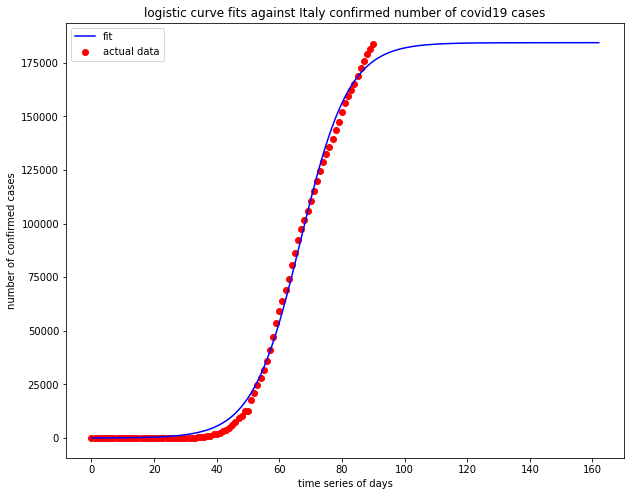

In [31]:
pred_x = np.array(list(x) + list(range(max(x),end)))
plt.scatter(x, y, label='actual data',color='red')
plt.plot(pred_x, logistic_curve(pred_x,*params),label='fit',color='blue')
plt.title('logistic curve fits against Italy confirmed number of covid19 cases')
plt.xlabel('time series of days')
plt.ylabel('number of confirmed cases')
plt.legend()
plt.show()

After plotting, I calculate the mean squared error and R squared to inspect the goodness of fit. 

In [32]:
y_pred_logistic = [logistic_curve(i,*params) for i in x]

In [33]:
from sklearn.metrics import mean_squared_error 
p = mean_squared_error(y,y_pred_logistic)
p

9947795.02715827

In [34]:
s1=sum((y-y_pred_logistic)**2)
s2=sum((y-np.mean(y))**2)
r= 1-(s1/s2)

In [35]:
r**2

0.9949543954153449

Finally, I plot the residual plot. 

In [36]:
from sklearn import preprocessing
residual = y-y_pred_logistic
standardize_res = preprocessing.scale(residual)

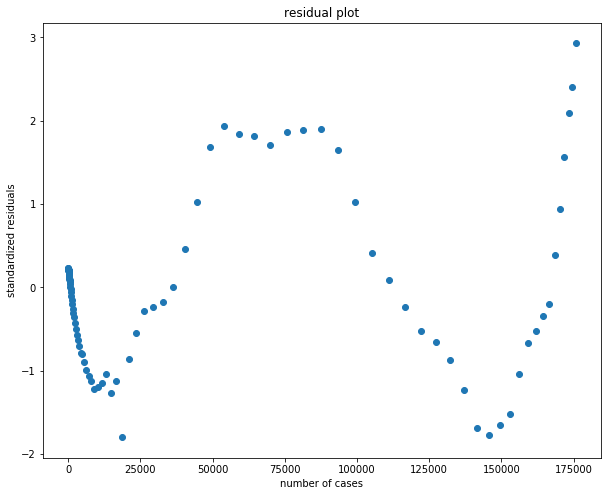

In [38]:
plt.scatter(y_pred_logistic,standardize_res)
plt.xlabel('number of cases')
plt.ylabel('standardized residuals')
plt.title('residual plot')
plt.show()